## General

This is a very brief documentation on how to run the experiments for our paper draft.

> M. Viljanen, A. Airola, T. Pahikkala. ”Generalized vec trick for fast learning of pairwise kernel models”, Submitted. https://arxiv.org/abs/2009.01054

The data sets can be downloaded from https://seafile.utu.fi/f/7740cec4087b4d57b034/. 

When extracted, the following folders are the data sets:
* `cyc_data/`: the 'Heterodimers' data set 
* `metz/`: the 'Metz' data set 
* `Merget_2967drugs/`: the 'Merget' and 'Kernel filling' data sets

The following files are utilities shared between the experiments:
* `data.py`: methods to load and generate data sets
* `learner.py`: methods to incorporate early stopping into learners
* `matvec.py`: methods to compute pairwise kernels directly and via the generalized vec-trick
* `validation.py`: methods to split data into train/validation/test sets for setting 1/2/3/4
* `cyc2008.py`: script to process public data sources into the 'Heterodimers' data set

The following files contain different experiments:
* `cyc_data.py`: the 'Heterodimers' data set experiments
* `ki_data.py` and `ki_data2.py`: the 'Metz' data set experiments
* `cichonska_kernels.py` and `cichonska_MLPK.py`: the 'Kernel filling' experiments
* `cichonska_kernels2.py`: the 'Merget' data set experiments

Below we explain precisely what to run in order to reproduce the results.

## Heterodimers


### Data

The script `cyc2008.py` is used to download and process the heterodimers data set. The heterodimers data set is obtained from several public data sources (WI-PHI, CYC2008, UniProt, GenomeNet) that are merged with each other. The original download location of each file for each data source is indicated in the comments. In the end, the experiments require only the following files in `cyc_data/` that are produced by running this script:
* `heterodimers.csv`: a list of valid (Protein A, Protein B) heterodimers.
* `unique_proteins.csv`: a list of all unique (Protein) identifiers.
* `K_domain_norm.csv`, `K_domain_min.csv`, `K_domain_minmax.csv`: The norm/min/mimax kernels based on Protein domain feature vector.
* `K_location_norm.csv`, `K_location_min.csv`, `K_location_minmax.csv`: The norm/min/mimax kernels based on Protein location feature vector.
* `K_genome_norm.csv`, `K_genome_min.csv`, `K_genome_minmax.csv`: The norm/min/mimax kernels based on Protein genome feature vector.



### Experiments

The experiment saves the Train AUC and Validation AUC as a function of iterations for every combination of the K_domain_minmax/K_location_minmax/K_genome_minmax Protein kernel, the Linear/Poly2D/Kronecker/Cartesian/Symmetric/MLPK pairwise kernels, and the Setting 1/Setting 2/Setting 3/Setting 4.

The script `cyc_data.py` is used to run the experiment. The experiment is run in two parts:
1. The function `compare_save()` runs the experiment and saves the results to `results/cyc_kernels.csv`.
2. The function `compare_load()` loads the results and prints/plots the results.

This is the **Figure 3.** in the draft:

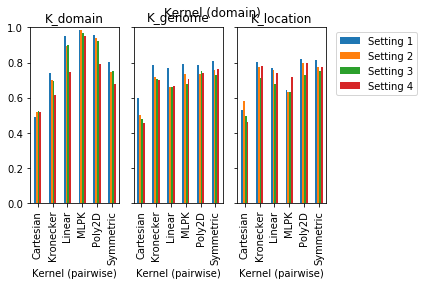

Kernel (pairwise)          Linear  Poly2D  Kronecker  Cartesian  Symmetric  \
Kernel (domain) Setting                                                      
K_domain        Setting 1    0.95    0.96       0.74       0.49       0.81   
                Setting 2    0.90    0.94       0.70       0.52       0.75   
                Setting 3    0.90    0.92       0.69       0.52       0.75   
                Setting 4    0.75    0.79       0.62       0.52       0.68   
K_genome        Setting 1    0.77    0.79       0.78       0.60       0.81   
                Setting 2    0.66    0.73       0.72       0.50       0.76   
                Setting 3    0.66    0.75       0.70       0.48       0.73   
                Setting 4    0.67    0.74       0.70       0.46       0.76   
K_location      Setting 1    0.77    0.82       0.80       0.53       0.81   
                Setting 2    0.76    0.80       0.77       0.58       0.77   
                Setting 3    0.68    0.73       0.71       0.50 

In [6]:
from cyc_data import compare_load
compare_load()

## Metz

### Data
The Metz data set can be downloaded from http://users.utu.fi/aatapa/data/DrugTarget/, and the files in `metz/` correspond to:
* `known_drug-target_interaction_affinities_pKi__Metz_et_al.2011.txt` is the interaction matrix Y.
* `drug-drug_similarities_2D__Metz_et_al.2011.txt` is the feature matrix of drug similarities XD. 
* `target-target_similarities_WS_normalized__Metz_et_al.2011.txt` is the feature matrix of target similarities XT.

We then compute the Linear kernel `KD=LinearKernel(XD)` and `KT=LinearKernel(XT)` or the Gaussian Kernel `KD=GaussianKernel(XD, gamma=10**-5)` and `KT=GaussianKernel(XT, gamma=10**-5)`.

### Experiments

In this case, there are two experiments. 

#### Visualizing regularization vs. early stopping.
The first experiment calculates the Train AUC and Validation AUC as a function of iterations for the Gaussian drug and target kernels with the Kronecker pairwise kernel for regularization parameters (0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000) in Setting 1 / Setting 2 / Setting 3 / Setting 4.

The script `ki_data.py` is used to run the experiment. The experiment is run in two parts:
1. The function `hyperparameters_save()` runs the experiment and saves the results to `results/ki_kernels_hyperpameters.csv`.
2. The function `hyperparameters_load()` loads the results and prints/plots the results.

This is the **Figure 2.** in the draft:

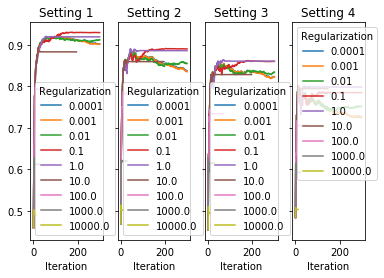

C:\Users\mvil4\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\mvil4\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\mvil4\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


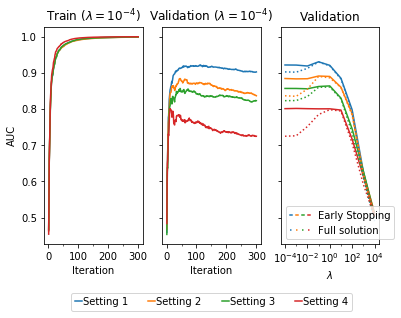

In [7]:
from ki_data import hyperparameters_load
hyperparameters_load()

#### Different combinations of drug/target kernels and pairwise kernels
The second experiment saves the Train AUC and Validation AUC as a function of iterations for every combination of the Linear/Gaussian drug and target kernel, the Linear/Poly2D/Kronecker/Cartesian pairwise kernels, and the Setting 1/Setting 2/Setting 3/Setting 4.

The script `ki_data.py` is used to run the experiment. The experiment is run in two parts:
1. The function `compare_save()` runs the experiment and saves the results to `results/ki_kernels.csv`.
2. The function `compare_load()` loads the results and prints/plots the results.

This is the **Figure 4.** in the draft:

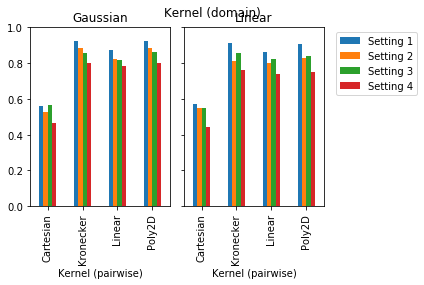

Kernel (pairwise)          Linear  Poly2D  Kronecker  Cartesian
Kernel (domain) Setting                                        
Gaussian        Setting 1    0.87    0.92       0.92       0.56
                Setting 2    0.82    0.88       0.88       0.53
                Setting 3    0.82    0.86       0.86       0.57
                Setting 4    0.79    0.80       0.80       0.46
Linear          Setting 1    0.86    0.91       0.91       0.57
                Setting 2    0.80    0.83       0.81       0.55
                Setting 3    0.83    0.84       0.86       0.55
                Setting 4    0.74    0.75       0.76       0.45


In [2]:
from ki_data import compare_load
compare_load()

## Merget

### Data
The Merget data set is stored in `Merget_2967drugs`, where:
* `drugs/Merget_DTIs_2967com_226kin.txt` is the interaction matrix Y.
* `drugs/drug_kernels/x.zip/x.txt` is the drug kernel matrix KD corresponding to kernel x. 
* `protein_kernels/protein_kernels.zip/x.txt` is the target kernel matrix KT corresponding to kernel x.


### Experiments

The experiment calculates the Train AUC and Validation AUC as a function of iterations for the combinations of the following drug and target kernels:
* ('Kd_Tanimoto-shortestpath.txt', 'Kp_GS-ATP_L5_Sp4.0_Sc4.0.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_GS-ATP_L5_Sp4.0_Sc4.0.txt')
* ('Kd_Tanimoto-kr.txt', 'Kp_GS-ATP_L5_Sp4.0_Sc4.0.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_GS-KINDOM_L5_Sp4.0_Sc4.0.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_GO-BP-log__GaussianK_gamma_1e-04.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_GO-CC-log__GaussianK_gamma_0.0039.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_SW-KIN_DOM.txt')
* ('Kd_Tanimoto-circular.txt', 'Kp_GS-Uniprot_L5_Sp3.0_Sc4.0.txt')

and the Linear/Poly2D/Kronecker/Cartesian pairwise kernel, and Setting 1 / Setting 2 / Setting 3 / Setting 4.

The script `cichonska_kernels2.py` is used to run the experiment. The experiment is run in two parts:
1. The function `compare_save()` runs the experiment and saves the results to `results/cichonska_kernels2b.csv`.
2. The function `compare_load()` loads the results and prints/plots the results.

This is the **Figure 5.** in the draft:

Kernel (pairwise)                                            Linear  Poly2D  \
Kernel (drug)            Kernel (protein)         Setting                     
Kd_Tanimoto-circular     Kp_GS-ATP_L5_Sp4.0_Sc4.0 Setting 1    0.89    0.92   
                                                  Setting 2    0.87    0.88   
                                                  Setting 3    0.81    0.87   
                                                  Setting 4    0.80    0.82   
Kd_Tanimoto-shortestpath Kp_GS-ATP_L5_Sp4.0_Sc4.0 Setting 1    0.89    0.91   
                                                  Setting 2    0.86    0.87   
                                                  Setting 3    0.81    0.83   
                                                  Setting 4    0.78    0.79   

Kernel (pairwise)                                            Kronecker  \
Kernel (drug)            Kernel (protein)         Setting                
Kd_Tanimoto-circular     Kp_GS-ATP_L5_Sp4.0_Sc4.0 Setting 1  

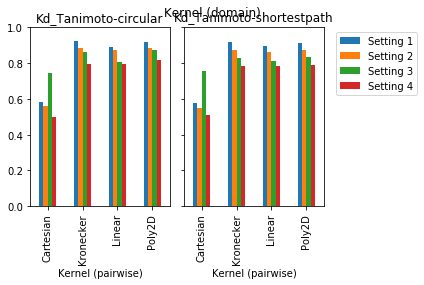

In [2]:
from cichonska_kernels2 import compare_load
compare_load()

The function `compare_load_all()` can be used to plot the results of every possible drug and target combination:

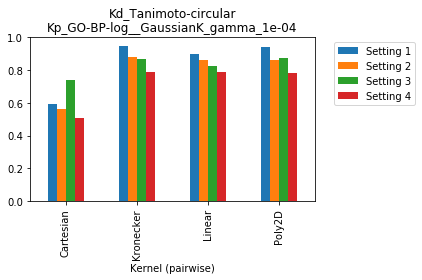

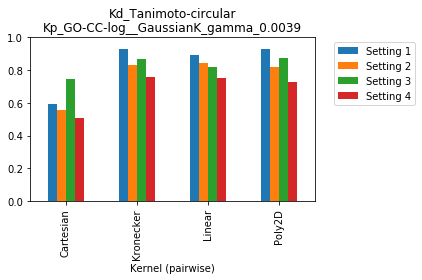

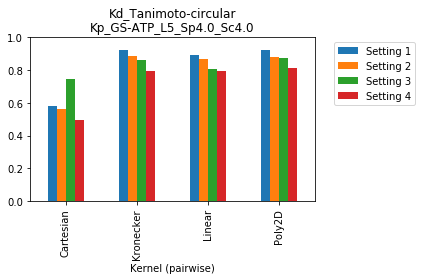

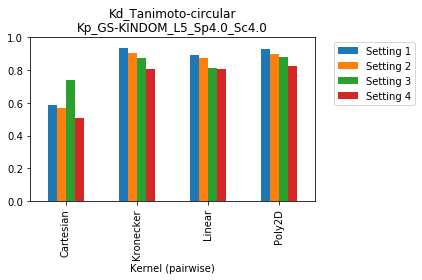

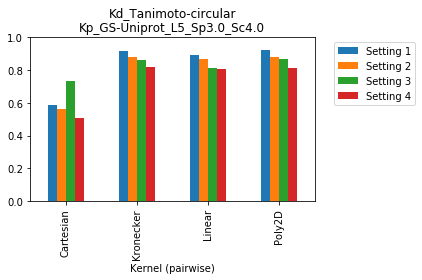

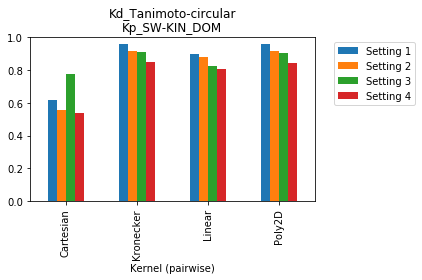

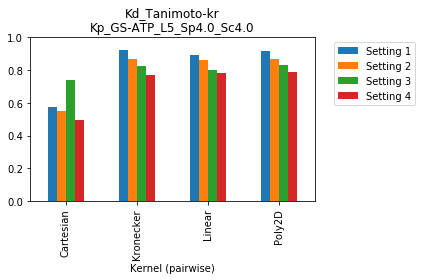

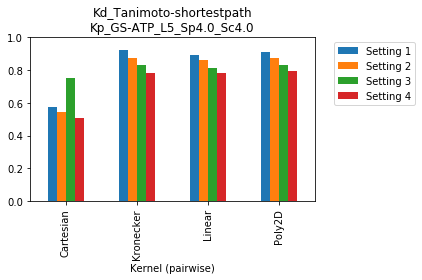

In [3]:
from cichonska_kernels2 import compare_load_all
compare_load_all()

## Kernel filling

### Data
The Merget data set is stored in `Merget_2967drugs`, where:
* `drugs/drug_kernels/x.zip/x.txt` is the drug kernel matrix K corresponding to kernel x used as features. 
* `drugs/drug_kernels/y.zip/y.txt` is the drug kernel matrix Y corresponding to kernel y to be filled. 

The experiment uses the `Kd_Tanimoto-estate.txt` as kernel K used as features and `Kd_Tanimoto-circular.txt` as kernel Y to be filled.

### Experiments

The experiment calculates the Train AUC, Test AUC, CPU time, MEM use, number of iterations for the combinations of samples N = (1000, 2000, 4000, ..., 1 024 000), the pairwise kernels Linear/Poly2D/Kronecker/Symmetric/MLPK, the settings Setting 1 / Setting 2 / Setting 3 / Setting 4, and methods RLScore / Baseline. Early stopping is used by splitting off validation from train, finding the number of iterations with early stopping, and training both methods on train with this number of iterations.


The script `cichonska_MLPK.py` is used to run the experiment. The experiment is run in two parts:
1. The function `compare_save()` runs the experiment and saves the results to `results/cichonska_MLPKb.csv`.
2. The function `compare_load()` loads the results and prints the results.
3. The function `compare_plot()` loads the results and plots the results.


In [4]:
from cichonska_MLPK import compare_load
compare_load()

AUC
N                     1000      2000      4000      8000      16000    \
Kernel    Setting                                                       
Kronecker Setting 1  0.684436  0.694654  0.683200  0.699074  0.714674   
          Setting 2  0.634976  0.669528  0.671435  0.687502  0.693183   
          Setting 3  0.658296  0.664210  0.670918  0.687355  0.693213   
          Setting 4  0.602982  0.654329  0.649453  0.669529  0.672211   
Linear    Setting 1  0.678066  0.620523  0.614755  0.658991  0.654972   
          Setting 2  0.650776  0.631585  0.619960  0.650019  0.641600   
          Setting 3  0.651100  0.631337  0.619851  0.650399  0.640235   
          Setting 4  0.620988  0.622086  0.626978  0.631630  0.629638   
MLPK      Setting 1  0.636710  0.686569  0.686114  0.719152  0.729875   
          Setting 2  0.555343  0.572812  0.562629  0.600933  0.611935   
          Setting 3  0.555595  0.576587  0.561123  0.599991  0.600448   
          Setting 4  0.495785  0.495001  0.4501

This is the **Figure 6.** in the draft:

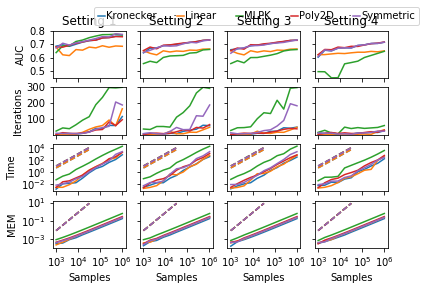

In [6]:
from cichonska_MLPK import compare_plot
compare_plot()